# Pedestrian Simulation using a Social Force Model



Import simulator, integration methods and kernel

In [1]:
# only needed for jupyter notebook
import os
import sys 
cwd = os.getcwd()
sys.path.append(f"{os.getcwd()}\\src")

# import matplotlib
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

# import simulation packages
from simulate.models.pedestrian import Actor, SocialForceModel
from simulate.models.pedestrian.obstacle import Obstacle

### Initialize the model

Choose a fitting integration method.

In [2]:
actors: List[Actor] = [
    Actor(
        identifier=0,
        position=np.array([-1.0, -1.0]),
        path=[np.array([1.0, 1.0])],
        max_speed=1.5,
    ),
    Actor(
        identifier=1,
        position=np.array([1.0, 1.0]),
        path=[np.array([-1.0, -1.0])],
        max_speed=1.5,
    ),
    Actor(
        identifier=2,
        position=np.array([1.0, -1.0]),
        path=[np.array([-1.0, 1.0])],
        max_speed=1.5,
    ),
    Actor(
        identifier=3,
        position=np.array([-1.0, 1.0]),
        path=[np.array([1.0, -1.0])],
        max_speed=1.5,
    ),
]

obstacles: List[Obstacle] = [
    Obstacle(position=np.array([0.5, 0.5])),
    Obstacle(position=np.array([-0.5, 0.5])),
    Obstacle(position=np.array([0.5, -0.5])),
    Obstacle(position=np.array([-0.5, -0.5])),
]

model = SocialForceModel(actors, obstacles)
labels = model.labels()

### Simulate and plot the results

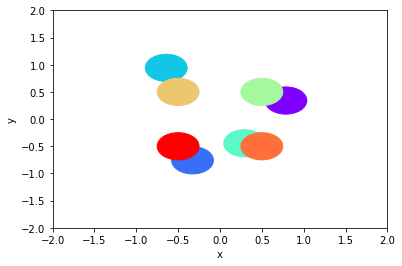

In [3]:
# Define the metadata for the movie
metadata = dict(title="Pedestrian Simulation", artist="Matplotlib", comment="Movie support!")
writer = animation.FFMpegWriter(fps=150, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots()

# plot the sine wave line
color_map = plt.cm.get_cmap("rainbow", 8)
actor_circles = []
i = 0
for actor in actors:
    circle = plt.Circle(
        actor.position, actor.get_comfort_zone() * 0.5, color=color_map(i)
    )
    ax.add_patch(circle)
    actor_circles.append(circle)
    i += 1
for obstacle in obstacles:
    circle = plt.Circle(
        obstacle.position, obstacle.get_radius() * 0.5, color=color_map(i)
    )
    ax.add_patch(circle)
    actor_circles.append(circle)
    i += 1
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.xlabel("x")
plt.ylabel("y")


def update(_):
    """update func"""
    model.simulate(0, 0.02)
    j = 0
    for act in actors:
        actor_circles[j].set_center(act.position)
        j += 1
    return actor_circles


ani = animation.FuncAnimation(fig, update, frames=100, blit=True)
HTML(ani.to_html5_video())